In [10]:
import os
import math
import pickle
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
metaFile1 = 'potential_metadata/all_data.txt'
metaFile2 = 'potential_metadata/data.txt'
colorFile = 'colorDict.p'
colorDict = pickle.load(open(colorFile, 'rb'))

In [43]:
class Well(object):
    def __init__(self, id, lat=None, long=None):
        self.id = id
        self.lat = lat
        self.long = long

class Sample(object):
    def __init__(self, samp_id, no3=None, temp=None):
        self.samp_id = samp_id
        self.no3 = no3      #mg/L
        self.temp = temp    #C

In [42]:
#Save Well objects and plot
all_wells = []
with open(metaFile1, 'r') as f:
    for line in f:
        if 'Location' in line:
            continue
        line = line.strip().split('\t')
        if (line[4] == '0') or (line[5] == '0') or (line[4] == '') or (line[5] == ''):
            newWell = Well(line[0])
        else:
            newWell = Well(line[0], lat=float(line[4]), long=-1*float(line[5]))
        all_wells.append(newWell)

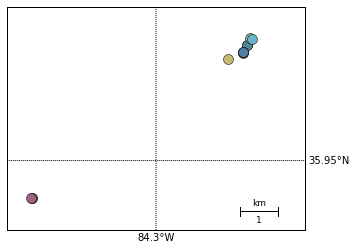

In [85]:
# setup Lambert Conformal basemap.
m = Basemap(width=8000,height=6000,projection='lcc',
            resolution='c', lat_1=45., lat_2=55, 
            lat_0=35.96, lon_0=-84.30) #central point

#m.fillcontinents(color='grey',lake_color='aqua')

# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
# go from meridian at 0N to 81N and label every 10
parallels = np.arange(32., 40., 0.05)

# labels = [left,right,top,bottom]
m.drawparallels(parallels, labels=[False,True,True,False])

meridians = np.arange(250., 290., 0.1)
m.drawmeridians(meridians, labels=[True,False,False,True])

m.drawmapscale(-84.27, 35.938, -84.3, 35.935, 1)

for w in all_wells:
    if (not w.lat) or (not w.long):
        continue
    if w.id not in colorDict:
        continue
    
    lat = w.lat
    lon = w.long
    
    # convert to map projection coords.
    # Note that lon,lat can be scalars, lists or numpy arrays.
    xpt, ypt = m(lon, lat)

    # convert back to lat/lon
    lonpt, latpt = m(xpt, ypt, inverse=True)

    m.plot(xpt, ypt, marker = 'o', color = colorDict[w.id], markersize=10)

    # put some text next to the dot, offset a little bit
    # (the offset is in map projection coordinates)
    #plt.text(xpt+1000,ypt+1000, w.id)
plt.show()

In [ ]:
#START HERE, CREATE SUBMAPS

# setup Lambert Conformal basemap.
m = Basemap(width=8000,height=6000,projection='lcc',
            resolution='c', lat_1=45., lat_2=55, 
            lat_0=35.96, lon_0=-84.30) #central point

#m.fillcontinents(color='grey',lake_color='aqua')

# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
# go from meridian at 0N to 81N and label every 10
parallels = np.arange(32., 40., 0.05)

# labels = [left,right,top,bottom]
m.drawparallels(parallels, labels=[False,True,True,False])

meridians = np.arange(250., 290., 0.1)
m.drawmeridians(meridians, labels=[True,False,False,True])

for w in all_wells:
    if (not w.lat) or (not w.long):
        continue
    if w.id not in colorDict:
        continue
    
    lat = w.lat
    lon = w.long
    
    # convert to map projection coords.
    # Note that lon,lat can be scalars, lists or numpy arrays.
    xpt, ypt = m(lon, lat)

    # convert back to lat/lon
    lonpt, latpt = m(xpt, ypt, inverse=True)

    m.plot(xpt, ypt, marker = 'o', color = colorDict[w.id])

    # put some text next to the dot, offset a little bit
    # (the offset is in map projection coordinates)
    #plt.text(xpt+1000,ypt+1000, w.id)
plt.show()